In [3]:
#!/usr/bin/env python3
import os
from functools import partial
from typing import Callable

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


import blackjax
import click
import jax
import jax.numpy as jnp
import jax.scipy as jsp
from jax import jit as jjit
from jax import random, vmap
from jax.typing import ArrayLike
from jax import random

from bpd import DATA_DIR
from bpd.chains import inference_loop
from bpd.io import save_dataset
from bpd.prior import ellip_mag_prior, sample_synthetic_sheared_ellips_unclipped

import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)



In [4]:
from bpd.pipelines.toy_ellips import pipeline_toy_ellips_samples
from bpd.prior import ellip_mag_prior

In [5]:
def _get_interim_samples(key, sigma_e_int:float, sigma_e, sigma_m, g1=0.02, g2=0.0, n_samples=10, k=1000):
    e_post, e_obs, e_sheared = pipeline_toy_ellips_samples(key, g1, g2, sigma_e=sigma_e, 
                                                       sigma_e_int=sigma_e_int, sigma_m=sigma_m, 
                                                       n_samples=10, k=k)
    return e_post, e_obs, e_sheared


## low noise

In [4]:
SEED = 32
key = random.key(SEED)

2024-11-01 13:40:13.412377: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [5]:
e_samples = { 
 'e_post': {}, 'e_obs':{}, 'e_sheared':{}
}

In [6]:
sigma_m=1e-4
sigma_e=1e-3

all_sigma_e_ints = (3e-4, 7e-4, 1e-3, 2e-3, 1e-2, 2e-2)

In [ ]:
for ii, x in enumerate(all_sigma_e_ints):
    print(ii)
    
    e_post, e_obs, e_sheared = _get_interim_samples(key, sigma_e_int=x, sigma_e=sigma_e, sigma_m=sigma_m)
    e_samples['e_post'][x] = e_post
    e_samples['e_obs'][x] = e_obs
    e_samples['e_sheared'][x] = e_sheared
    

0


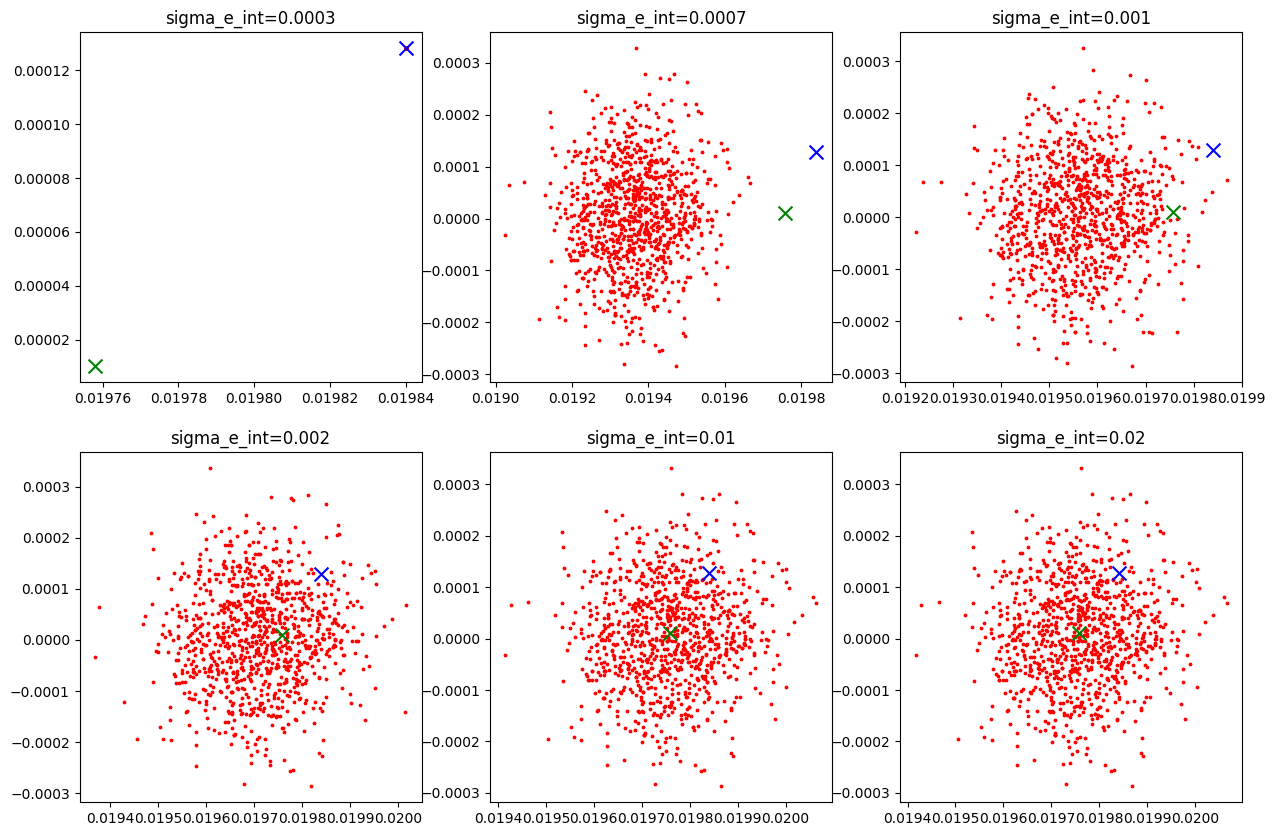

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axs = axes.ravel()

idx=2

for ii, ax in enumerate(axs):
    x = all_sigma_e_ints[ii]
    e_post = e_samples['e_post'][x]
    e_obs = e_samples['e_obs'][x]
    e_sheared = e_samples['e_sheared'][x]
    
    ax.scatter(e_post[idx, :, 0], e_post[idx, :, 1], s=3, color='r')
    ax.scatter(e_obs[idx, 0], e_obs[idx, 1], s=100, color='g', marker='x')
    ax.scatter(e_sheared[idx, 0], e_sheared[idx, 1], s=100, color='b', marker='x')
    ax.set_title(f"sigma_e_int={x}")



## high noise

## low shape noise, high noise

In [6]:

SEED = 32
key = random.key(SEED)

2024-11-01 13:44:07.962889: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [7]:
e_samples = { 
 'e_post': {}, 'e_obs':{}, 'e_sheared':{}
}

In [12]:
sigma_m=1e-2
sigma_e=1e-3

all_sigma_e_ints = (1e-4, 1e-3, 2e-3, 1e-2, 2e-2, 1e-1)

In [13]:
for ii, x in enumerate(all_sigma_e_ints):
    print(ii)
    
    e_post, e_obs, e_sheared = _get_interim_samples(key, sigma_e_int=x, sigma_e=sigma_e, sigma_m=sigma_m)
    e_samples['e_post'][x] = e_post
    e_samples['e_obs'][x] = e_obs
    e_samples['e_sheared'][x] = e_sheared
    

0
1
2
3
4
5


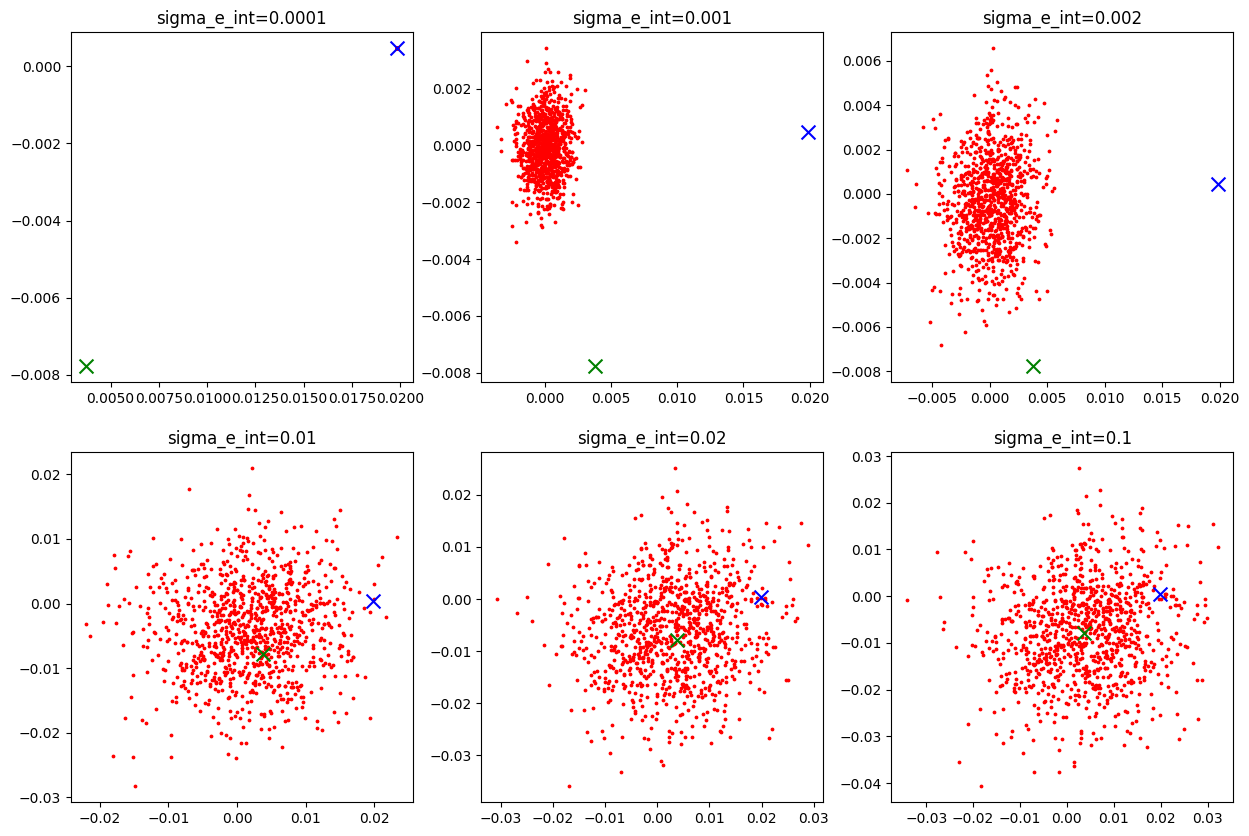

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axs = axes.ravel()

idx=11

for ii, ax in enumerate(axs):
    x = all_sigma_e_ints[ii]
    e_post = e_samples['e_post'][x]
    e_obs = e_samples['e_obs'][x]
    e_sheared = e_samples['e_sheared'][x]
    
    ax.scatter(e_post[idx, :, 0], e_post[idx, :, 1], s=3, color='r')
    ax.scatter(e_obs[idx, 0], e_obs[idx, 1], s=100, color='g', marker='x')
    ax.scatter(e_sheared[idx, 0], e_sheared[idx, 1], s=100, color='b', marker='x')
    ax.set_title(f"sigma_e_int={x}")



In [19]:
SEED = 32
key = random.key(SEED)

In [20]:
e_samples2 = { 
 'e_post': {}, 'e_obs':{}, 'e_sheared':{}
}

In [21]:
sigma_m=0.1
sigma_e=0.3

all_sigma_e_ints = (0.01, 0.1, 0.3, 0.31, 0.33, 0.5)

for ii, x in enumerate(all_sigma_e_ints):
    print(ii)
    
    e_post, e_obs, e_sheared = _get_interim_samples(key, sigma_e_int=x, sigma_e=sigma_e, sigma_m=sigma_m)
    e_samples2['e_post'][x] = e_post
    e_samples2['e_obs'][x] = e_obs
    e_samples2['e_sheared'][x] = e_sheared
    

0
1
2
3
4
5


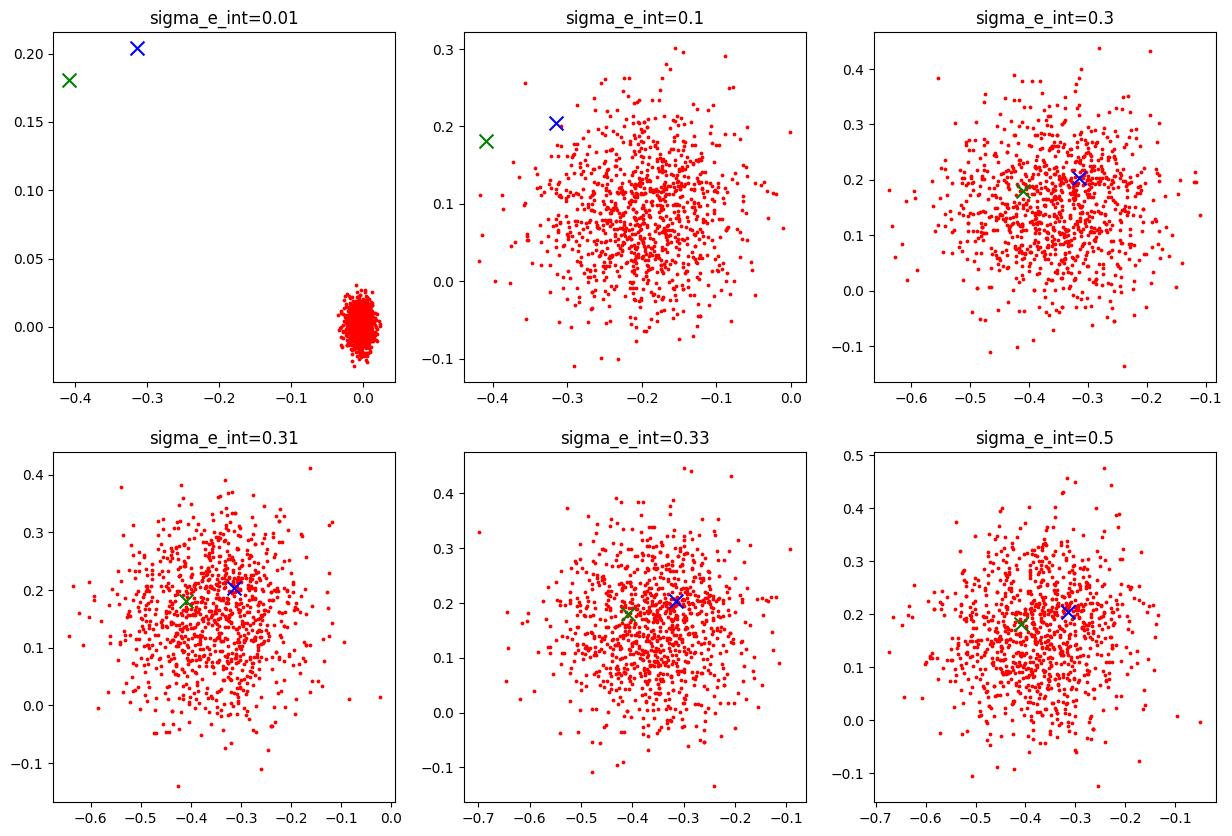

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axs = axes.ravel()

idx=0

for ii, ax in enumerate(axs):
    x = all_sigma_e_ints[ii]
    e_post = e_samples2['e_post'][x]
    e_obs = e_samples2['e_obs'][x]
    e_sheared = e_samples2['e_sheared'][x]
    
    ax.scatter(e_post[idx, :, 0], e_post[idx, :, 1], s=3, color='r')
    ax.scatter(e_obs[idx, 0], e_obs[idx, 1], s=100, color='g', marker='x')
    ax.scatter(e_sheared[idx, 0], e_sheared[idx, 1], s=100, color='b', marker='x')
    ax.set_title(f"sigma_e_int={x}")



In [24]:
3

3